In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

In [2]:
sns.set_context("paper")
sns.set_style("ticks")

In [5]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["Random Forest Prediction"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["Gradient Boosted Regressor Prediction"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS Prediction"] = ols.iloc[:,-1:]
#prices["XBG Regressor Prediction"] = pd.read_csv("")

<AxesSubplot:>

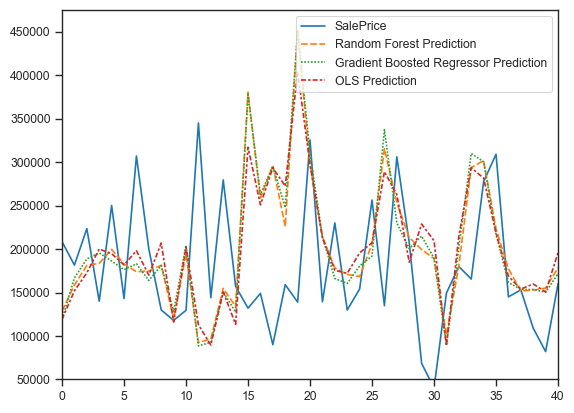

In [18]:
plt.xlim(0, 40)
plt.ylim(50000, 475000)
sns.lineplot(data=prices)

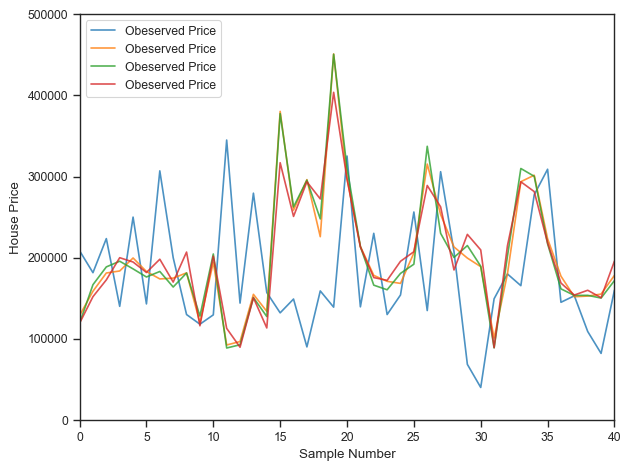

In [9]:
fig, ax = plt.subplots()
#plt.plot(rf, alpha=0.8, label=r"Random Forest Prediction")
#plt.plot(gbr, alpha=0.8, label=r"Gradient Boosted Regressor Prediction")
#plt.plot(ols, alpha=0.8, label=r"OLS Prediction")
#plt.plot(XBG_prediction, alpha=0.8, label=r"XBG Regressor Prediction")

plt.plot(prices, alpha=0.8, label=r"Obeserved Price")

# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")

# create a legend
plt.legend(loc="upper left")
plt.xlim(0, 40)
plt.ylim(0, 500000)
plt.tight_layout()

plt.show()